In [14]:
!pip3 install matplotlib openpyxl

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------  7.9/8.1 MB 42.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 34.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 20.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

from evaluate.siso import SISOAnalysis 

# Read the Excel file 
# https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification/input
df = pd.read_excel('bank_personal_model.xlsx', sheet_name='Data')

X_col = ['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
y_col = 'Personal Loan'

X = df[X_col]
y = df[y_col]
# create a conditional list comprehension
y = [(1- i) if np.random.random() > 0.15 else i for i in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Create and train the random forest model
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

# Predict and evaluate the logistic regression model
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Logistic Regression Model Accuracy: {accuracy1}')

# Predict and evaluate the random forest model
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Random Forest Model Accuracy: {accuracy2}')

# Calculate the ROC curve and AUC for model1
y_pred_prob1 = model1.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
roc_auc1 = roc_auc_score(y_test, y_pred_prob1)

# Calculate the ROC curve and AUC for model2
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
roc_auc2 = roc_auc_score(y_test, y_pred_prob2)

NameError: name 'pd' is not defined

In [44]:
input_df = pd.concat([
    pd.Series(X_test['ID'], name='primary_key')
    , pd.Series(y_pred_prob1, name='champ_prob')
    , pd.Series(pd.qcut(y_pred_prob1, labels=["A", "B", "C", "D", "E"], q=5), name="champ_rat")
    , pd.Series(y_pred_prob2, name='chall_prob')
    , pd.Series(y_test, name='y_test')
    ])

from evaluate.siso import SISOAnalysis 

siso = SISOAnalysis(input_df)

NameError: name 'pd' is not defined

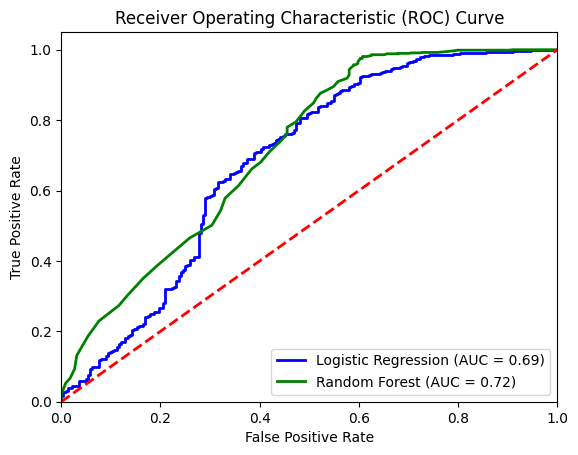

In [39]:
# Plot the ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()